# Proyecto 1: Análisis de Datos de Defunciones INE (2013-2022)

Lectura y consolidación de datos de defunciones del INE

In [1]:
# Importar librerías necesarias
import pandas as pd
import pyreadstat
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import unicodedata

In [2]:
# Definir ruta de datos y años a procesar
data_path = Path('data/defunciones')
years = range(2013, 2023)  # 2013 a 2022

# Verificar que los archivos existen
print("Archivos encontrados:")
for year in years:
    file_path = data_path / f"{year}.sav"
    if file_path.exists():
        print(f"  OK {year}.sav")
    else:
        print(f"  FALTA {year}.sav (NO ENCONTRADO)")

Archivos encontrados:
  OK 2013.sav
  OK 2014.sav
  OK 2015.sav
  OK 2016.sav
  OK 2017.sav
  OK 2018.sav
  OK 2019.sav
  OK 2020.sav
  OK 2021.sav
  OK 2022.sav


In [3]:
# Leer todos los archivos .sav y verificar columnas
dataframes = {}
all_columns = {}

print("Leyendo archivos .sav...\n")

for year in years:
    file_path = data_path / f"{year}.sav"
    if file_path.exists():
        try:
            # Leer archivo .sav
            df, meta = pyreadstat.read_sav(str(file_path))
            dataframes[year] = df
            all_columns[year] = list(df.columns)
            print(f"Año {year}: {len(df):,} registros, {len(df.columns)} columnas")
        except Exception as e:
            print(f"Error al leer {year}.sav: {e}")

Leyendo archivos .sav...

Año 2013: 76,639 registros, 28 columnas
Año 2014: 77,807 registros, 27 columnas
Año 2015: 80,876 registros, 28 columnas
Año 2016: 82,565 registros, 28 columnas
Año 2017: 81,726 registros, 28 columnas
Año 2018: 83,071 registros, 27 columnas
Año 2019: 85,600 registros, 27 columnas
Año 2020: 96,001 registros, 27 columnas
Año 2021: 118,465 registros, 27 columnas
Año 2022: 95,386 registros, 27 columnas


In [4]:
# Recopilar todas las columnas únicas de todos los años
print("\n" + "="*60)
print("ANÁLISIS DE COLUMNAS POR AÑO")
print("="*60)

if len(all_columns) > 0:
    # Obtener todas las columnas únicas
    all_unique_columns = set()
    for columns in all_columns.values():
        all_unique_columns.update(columns)
    
    all_unique_columns = sorted(all_unique_columns)
    
    print(f"\nTotal de columnas únicas en todos los años: {len(all_unique_columns)}")
    
    # Crear un dataframe que muestre qué columnas tiene cada año
    columnas_por_año = {}
    for col in all_unique_columns:
        columnas_por_año[col] = {}
        for year in sorted(all_columns.keys()):
            columnas_por_año[col][year] = 'OK' if col in all_columns[year] else 'NULL'
    
    df_columnas = pd.DataFrame(columnas_por_año).T
    
    print(f"\nResumen de disponibilidad de columnas por año:")
    print(f"(OK = columna presente, NULL = columna ausente)\n")
    display(df_columnas)
    
    # Contar cuántas columnas faltan por año
    print("\nResumen de columnas por año:")
    for year in sorted(all_columns.keys()):
        num_cols = len(all_columns[year])
        faltantes = len(all_unique_columns) - num_cols
        print(f"  Año {year}: {num_cols} columnas (faltan {faltantes})")
else:
    print("No se pudieron leer archivos")


ANÁLISIS DE COLUMNAS POR AÑO

Total de columnas únicas en todos los años: 29

Resumen de disponibilidad de columnas por año:
(OK = columna presente, NULL = columna ausente)



,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Areag,OK,OK,OK,OK,OK,NULL,NULL,NULL,NULL,NULL
Asist,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
Añoocu,NULL,NULL,OK,OK,OK,OK,OK,OK,OK,OK
Añoreg,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
Caudef,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
Cerdef,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
Ciuodif,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
Depocu,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
Depreg,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
Diaocu,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK



Resumen de columnas por año:
  Año 2013: 28 columnas (faltan 1)
  Año 2014: 27 columnas (faltan 2)
  Año 2015: 28 columnas (faltan 1)
  Año 2016: 28 columnas (faltan 1)
  Año 2017: 28 columnas (faltan 1)
  Año 2018: 27 columnas (faltan 2)
  Año 2019: 27 columnas (faltan 2)
  Año 2020: 27 columnas (faltan 2)
  Año 2021: 27 columnas (faltan 2)
  Año 2022: 27 columnas (faltan 2)


In [5]:
# Unir todos los dataframes incluyendo TODAS las columnas (rellenando con NULL donde no existan)
if len(dataframes) > 0:
    print("\n" + "="*60)
    print("CONSOLIDACIÓN DE DATOS")
    print("="*60)
    
    # Agregar columna de año a cada dataframe
    dfs_with_year = []
    for year, df in dataframes.items():
        df_copy = df.copy()
        df_copy['año'] = year
        dfs_with_year.append(df_copy)
    
    # Concatenar todos los dataframes
    # sort=False mantiene el orden de columnas, las columnas faltantes se rellenan con NaN
    df_consolidado = pd.concat(dfs_with_year, ignore_index=True, sort=False)
    
    # Eliminar columna de descripcion de causa (no usar segun diccionario)
    if 'caudef.descrip' in df_consolidado.columns:
        df_consolidado = df_consolidado.drop(columns=['caudef.descrip'])
    
    print(f"\nDataframe consolidado creado exitosamente")
    print(f"  - Total de registros: {len(df_consolidado):,}")
    print(f"  - Total de columnas (incluyendo 'año'): {len(df_consolidado.columns)}")
    print(f"  - Años incluidos: {sorted(df_consolidado['año'].unique())}")
    
    # Mostrar valores nulos por columna
    print(f"\nColumnas con valores NULL:")
    null_counts = df_consolidado.isnull().sum()
    null_cols = null_counts[null_counts > 0].sort_values(ascending=False)
    
    if len(null_cols) > 0:
        print(f"\nTotal de columnas con NULL: {len(null_cols)}")
        print("\nTop 10 columnas con más valores NULL:")
        for col, count in null_cols.head(10).items():
            pct = (count / len(df_consolidado)) * 100
            print(f"  {col}: {count:,} ({pct:.1f}%)")
    else:
        print("  No hay valores NULL en el dataframe")
    
    print(f"\nPrimeras filas del dataframe consolidado:")
    display(df_consolidado.head())
else:
    print("\n⚠ No se pudieron leer archivos")
    df_consolidado = None


CONSOLIDACIÓN DE DATOS

Dataframe consolidado creado exitosamente
  - Total de registros: 878,136
  - Total de columnas (incluyendo 'año'): 29
  - Años incluidos: [np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

Columnas con valores NULL:

Total de columnas con NULL: 2

Top 10 columnas con más valores NULL:
  Areag: 478,523 (54.5%)
  Añoocu: 154,446 (17.6%)

Primeras filas del dataframe consolidado:


,Depreg,Mupreg,Mesreg,Añoreg,Depocu,Mupocu,Areag,Sexo,Diaocu,Mesocu,...,Nacdif,Predif,Dredif,Mredif,Caudef,Asist,Ocur,Cerdef,año,Añoocu
0,13.0,1327,10.0,2013.0,13.0,1327,2.0,1.0,4.0,10.0,...,320.0,320.0,13.0,1327,R000,1.0,6.0,9.0,2013,NaN
1,1.0,0101,5.0,2013.0,1.0,0101,1.0,2.0,25.0,5.0,...,320.0,320.0,1.0,0101,R000,1.0,2.0,1.0,2013,NaN
2,8.0,0801,5.0,2013.0,8.0,0801,2.0,2.0,25.0,5.0,...,320.0,320.0,8.0,0801,R000,5.0,6.0,9.0,2013,NaN
3,6.0,0606,3.0,2013.0,6.0,0606,2.0,1.0,19.0,3.0,...,320.0,9999.0,99.0,9999,R000,5.0,6.0,9.0,2013,NaN
4,1.0,0113,4.0,2013.0,1.0,0113,2.0,2.0,7.0,4.0,...,320.0,9999.0,99.0,9999,R011,5.0,6.0,1.0,2013,NaN


In [6]:
# Mostrar distribución de registros por año
if df_consolidado is not None:
    print("\n" + "="*60)
    print("DISTRIBUCIÓN DE REGISTROS POR AÑO")
    print("="*60)
    
    distribucion = df_consolidado['año'].value_counts().sort_index()
    print("\n", distribucion)
    
    print(f"\nTotal general: {len(df_consolidado):,} registros")


DISTRIBUCIÓN DE REGISTROS POR AÑO

 año
2013     76639
2014     77807
2015     80876
2016     82565
2017     81726
2018     83071
2019     85600
2020     96001
2021    118465
2022     95386
Name: count, dtype: int64

Total general: 878,136 registros


## 1. Exploración de Variables Numéricas

**Nota metodológica:** La clasificación de variables (cuantitativas vs. cualitativas) se hace según el [diccionario de datos](diccionario.md). Muchas columnas son códigos numéricos, pero representan categorías (por ejemplo, departamento, municipio o causa).

In [7]:
if df_consolidado is not None:
    print("="*70)
    print("CLASIFICACIÓN DE VARIABLES SEGÚN DICCIONARIO")
    print("="*70)

    def normalize_col(name):
        text = str(name).strip().lower()
        text = "".join(
            ch for ch in unicodedata.normalize("NFKD", text)
            if not unicodedata.combining(ch)
        )
        return text

    available_map = {normalize_col(c): c for c in df_consolidado.columns}

    dicc_cuantitativas = [
        "Añoreg", "Añoocu", "Diaocu", "Edadif"
    ]

    dicc_cualitativas = [
        "Depreg", "Mupreg", "Mesreg", "Depocu", "Mupocu", "Mesocu",
        "Areag", "Ocur", "Sexo", "Perdif", "Puedif", "Ecidif",
        "Escodif", "Ciuodif", "Pnadif", "Dnadif", "Mnadif", "Nacdif",
        "Predif", "Dredif", "Mredif", "Caudef", "Asist", "Cerdef"
    ]

    def resolve_cols(cols):
        resolved = []
        missing = []
        for col in cols:
            key = normalize_col(col)
            if key in available_map:
                resolved.append(available_map[key])
            else:
                missing.append(col)
        return resolved, missing

    def pick_col(options):
        for opt in options:
            key = normalize_col(opt)
            if key in available_map:
                return available_map[key]
        return None

    variables_cuantitativas, missing_cuant = resolve_cols(dicc_cuantitativas)
    variables_cualitativas, missing_cual = resolve_cols(dicc_cualitativas)

    if "año" in df_consolidado.columns and "año" not in variables_cuantitativas:
        variables_cuantitativas.append("año")

    variables_cuantitativas = list(dict.fromkeys(variables_cuantitativas))
    variables_cualitativas = list(dict.fromkeys(variables_cualitativas))

    print(f"Cuantitativas (diccionario): {variables_cuantitativas}")
    print(f"Cualitativas (diccionario): {variables_cualitativas}")

    if missing_cuant:
        print(f"Cuantitativas no encontradas: {missing_cuant}")
    if missing_cual:
        print(f"Cualitativas no encontradas: {missing_cual}")

CLASIFICACIÓN DE VARIABLES SEGÚN DICCIONARIO
Cuantitativas (diccionario): ['Añoreg', 'Añoocu', 'Diaocu', 'Edadif', 'año']
Cualitativas (diccionario): ['Depreg', 'Mupreg', 'Mesreg', 'Depocu', 'Mupocu', 'Mesocu', 'Areag', 'Ocur', 'Sexo', 'Perdif', 'Puedif', 'Ecidif', 'Escodif', 'Ciuodif', 'Pnadif', 'Dnadif', 'Mnadif', 'Nacdif', 'Predif', 'Dredif', 'Mredif', 'Caudef', 'Asist', 'Cerdef']


In [8]:
if df_consolidado is not None:
    print("="*70)
    print("EXPLORACIÓN DE VARIABLES NUMÉRICAS (SEGÚN DICCIONARIO)")
    print("="*70)

    if "variables_cuantitativas" in globals():
        numeric_cols = [c for c in variables_cuantitativas if c in df_consolidado.columns]
    else:
        numeric_cols = df_consolidado.select_dtypes(include=['int64', 'float64']).columns.tolist()

    print(f"\nVariables numéricas reales ({len(numeric_cols)}):")
    for col in numeric_cols:
        print(f"  - {col}")

    if "variables_cualitativas" in globals():
        coded_as_numeric = [
            c for c in variables_cualitativas
            if c in df_consolidado.columns and pd.api.types.is_numeric_dtype(df_consolidado[c])
        ]
        if coded_as_numeric:
            print("\nVariables que parecen numéricas pero son códigos (cualitativas):")
            for col in coded_as_numeric:
                print(f"  - {col}")

    if len(numeric_cols) == 0:
        print("\nNo hay variables cuantitativas disponibles para describir.")
    else:
        print("\n" + "-"*70)
        print("ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS")
        print("-"*70)

        def normalize_name(name):
            text = str(name).strip().lower()
            text = "".join(
                ch for ch in unicodedata.normalize("NFKD", text)
                if not unicodedata.combining(ch)
            )
            return text

        stats_data = df_consolidado[numeric_cols].copy()
        for col in numeric_cols:
            if normalize_name(col) == "edadif":
                stats_data[col] = stats_data[col].replace(999, np.nan)

        stats_df = stats_data.describe().T
        stats_df['rango'] = stats_df['max'] - stats_df['min']
        stats_df['cv'] = (stats_df['std'] / stats_df['mean'] * 100).round(2)

        print("\n")
        display(stats_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'rango', 'cv']])

EXPLORACIÓN DE VARIABLES NUMÉRICAS (SEGÚN DICCIONARIO)

Variables numéricas reales (5):
  - Añoreg
  - Añoocu
  - Diaocu
  - Edadif
  - año

Variables que parecen numéricas pero son códigos (cualitativas):
  - Depreg
  - Mesreg
  - Depocu
  - Mesocu
  - Areag
  - Ocur
  - Sexo
  - Perdif
  - Puedif
  - Ecidif
  - Escodif
  - Pnadif
  - Dnadif
  - Nacdif
  - Predif
  - Dredif
  - Asist
  - Cerdef

----------------------------------------------------------------------
ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
----------------------------------------------------------------------




,count,mean,std,min,25%,50%,75%,max,rango,cv
Añoreg,878136.0,2017.836156,2.898027,2013.0,2015.0,2018.0,2020.0,2023.0,10.0,0.14
Añoocu,723690.0,2018.725528,2.297769,2015.0,2017.0,2019.0,2021.0,2022.0,7.0,0.11
Diaocu,878136.0,15.684942,8.813153,1.0,8.0,16.0,23.0,31.0,30.0,56.19
Edadif,872961.0,55.662436,27.433288,0.0,35.0,62.0,78.0,122.0,122.0,49.29
año,878136.0,2017.807130,2.889169,2013.0,2015.0,2018.0,2020.0,2022.0,9.0,0.14


## 2. Medidas de Tendencia Central, Distribución y Orden

In [9]:
if df_consolidado is not None:
    print("="*70)
    print("MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN")
    print("="*70)

    if "variables_cuantitativas" in globals():
        numeric_cols = [c for c in variables_cuantitativas if c in df_consolidado.columns]
    else:
        numeric_cols = df_consolidado.select_dtypes(include=['int64', 'float64']).columns.tolist()

    def normalize_name(name):
        text = str(name).strip().lower()
        text = "".join(
            ch for ch in unicodedata.normalize("NFKD", text)
            if not unicodedata.combining(ch)
        )
        return text

    if len(numeric_cols) == 0:
        print("\nNo hay variables cuantitativas disponibles para analizar.")
    else:
        for col in numeric_cols:
            data = df_consolidado[col].copy()
            if normalize_name(col) == "edadif":
                data = data.replace(999, np.nan)
            data = data.dropna()

            print(f"\nVariable: {col}")
            print(f"  Cantidad de datos válidos: {len(data):,}")

            media = data.mean()
            mediana = data.median()
            moda_result = stats.mode(data, keepdims=True)

            print(f"\n  Tendencia Central:")
            print(f"    - Media:    {media:.4f}")
            print(f"    - Mediana:  {mediana:.4f}")
            if moda_result.count > 0:
                moda_val = moda_result.mode[0] if hasattr(moda_result.mode, '__getitem__') else moda_result.mode
                print(f"    - Moda:     {moda_val:.4f} (frecuencia: {moda_result.count})")

            std = data.std()
            var = data.var()
            rango = data.max() - data.min()
            ric = data.quantile(0.75) - data.quantile(0.25)

            print(f"\n  Dispersión:")
            print(f"    - Desv. Estándar: {std:.4f}")
            print(f"    - Varianza:       {var:.4f}")
            print(f"    - Rango:          {rango:.4f}")
            print(f"    - RIC (Q3-Q1):    {ric:.4f}")

            asimetria = stats.skew(data)
            curtosis = stats.kurtosis(data)

            print(f"\n  Forma de la distribución:")
            print(f"    - Asimetría (Skewness):  {asimetria:.4f}", end="")
            if asimetria > 0.5:
                print(" (asimétrica derecha)")
            elif asimetria < -0.5:
                print(" (asimétrica izquierda)")
            else:
                print(" (simétrica)")

            print(f"    - Curtosis:              {curtosis:.4f}", end="")
            if curtosis > 0.5:
                print(" (leptocúrtica - colas pesadas)")
            elif curtosis < -0.5:
                print(" (platicúrtica - colas ligeras)")
            else:
                print(" (mesocúrtica - normal)")

            print(f"\n  Percentiles:")
            for percentil in [10, 25, 50, 75, 90, 95, 99]:
                valor = data.quantile(percentil/100)
                print(f"    - P{percentil:2d}: {valor:.4f}")

MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN

Variable: Añoreg
  Cantidad de datos válidos: 878,136

  Tendencia Central:
    - Media:    2017.8362
    - Mediana:  2018.0000
    - Moda:     2021.0000 (frecuencia: [118434])

  Dispersión:
    - Desv. Estándar: 2.8980
    - Varianza:       8.3986
    - Rango:          10.0000
    - RIC (Q3-Q1):    5.0000

  Forma de la distribución:
    - Asimetría (Skewness):  -0.1424 (simétrica)
    - Curtosis:              -1.2372 (platicúrtica - colas ligeras)

  Percentiles:
    - P10: 2014.0000
    - P25: 2015.0000
    - P50: 2018.0000
    - P75: 2020.0000
    - P90: 2022.0000
    - P95: 2022.0000
    - P99: 2022.0000

Variable: Añoocu
  Cantidad de datos válidos: 723,690

  Tendencia Central:
    - Media:    2018.7255
    - Mediana:  2019.0000
    - Moda:     2021.0000 (frecuencia: [118465])

  Dispersión:
    - Desv. Estándar: 2.2978
    - Varianza:       5.2797
    - Rango:          7.0000
    - RIC (Q3-Q1):    4.0000

  Forma de la distribución:
 

## 3. Exploración de Variables Categóricas

In [10]:
if df_consolidado is not None:
    print("="*70)
    print("EXPLORACIÓN DE VARIABLES CATEGÓRICAS (SEGÚN DICCIONARIO)")
    print("="*70)

    if "variables_cualitativas" in globals():
        categorical_cols = [c for c in variables_cualitativas if c in df_consolidado.columns]
    else:
        categorical_cols = []

    extra_categoricas = [
        c for c in df_consolidado.select_dtypes(include=['object']).columns
        if c != 'año' and c not in categorical_cols and c != 'caudef.descrip'
    ]

    categorical_cols = list(dict.fromkeys(categorical_cols + extra_categoricas))

    print(f"\nVariables categóricas identificadas ({len(categorical_cols)}):")
    for col in categorical_cols:
        print(f"  - {col}")

    print("\n" + "-"*70)
    print("ANÁLISIS DETALLADO DE VARIABLES CATEGÓRICAS")
    print("-"*70)

    for col in categorical_cols:
        data = df_consolidado[col]
        print(f"\nVariable: {col}")
        print(f"  - Valores únicos: {data.nunique():,}")
        print(f"  - Valores missing: {data.isna().sum():,} ({data.isna().sum()/len(data)*100:.1f}%)")
        print(f"  - Tasa de cardinalidad: {data.nunique()/len(data)*100:.2f}%")
        print(f"\n  Top 10 valores más frecuentes:")

        top_values = data.value_counts().head(10)
        for idx, (valor, freq) in enumerate(top_values.items(), 1):
            pct = freq / len(data[data.notna()]) * 100
            print(f"    {idx:2d}. {str(valor)[:50]:50s} : {freq:8,d} ({pct:5.2f}%)")

EXPLORACIÓN DE VARIABLES CATEGÓRICAS (SEGÚN DICCIONARIO)

Variables categóricas identificadas (24):
  - Depreg
  - Mupreg
  - Mesreg
  - Depocu
  - Mupocu
  - Mesocu
  - Areag
  - Ocur
  - Sexo
  - Perdif
  - Puedif
  - Ecidif
  - Escodif
  - Ciuodif
  - Pnadif
  - Dnadif
  - Mnadif
  - Nacdif
  - Predif
  - Dredif
  - Mredif
  - Caudef
  - Asist
  - Cerdef

----------------------------------------------------------------------
ANÁLISIS DETALLADO DE VARIABLES CATEGÓRICAS
----------------------------------------------------------------------

Variable: Depreg
  - Valores únicos: 22
  - Valores missing: 0 (0.0%)
  - Tasa de cardinalidad: 0.00%

  Top 10 valores más frecuentes:
     1. 1.0                                                :  257,619 (29.34%)
     2. 9.0                                                :   54,538 ( 6.21%)
     3. 16.0                                               :   52,538 ( 5.98%)
     4. 12.0                                               :   51,824 ( 5.90%)


## 4. Tablas de Frecuencia

TABLAS DE FRECUENCIA

TABLA DE FRECUENCIA: año



,Categoría,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada,Freq. Acumulada %
0,2013,76639,8.73,76639,8.73
1,2014,77807,8.86,154446,17.59
2,2015,80876,9.21,235322,26.80
3,2016,82565,9.40,317887,36.20
4,2017,81726,9.31,399613,45.51
5,2018,83071,9.46,482684,54.97
6,2019,85600,9.75,568284,64.71
7,2020,96001,10.93,664285,75.65
8,2021,118465,13.49,782750,89.14
9,2022,95386,10.86,878136,100.00


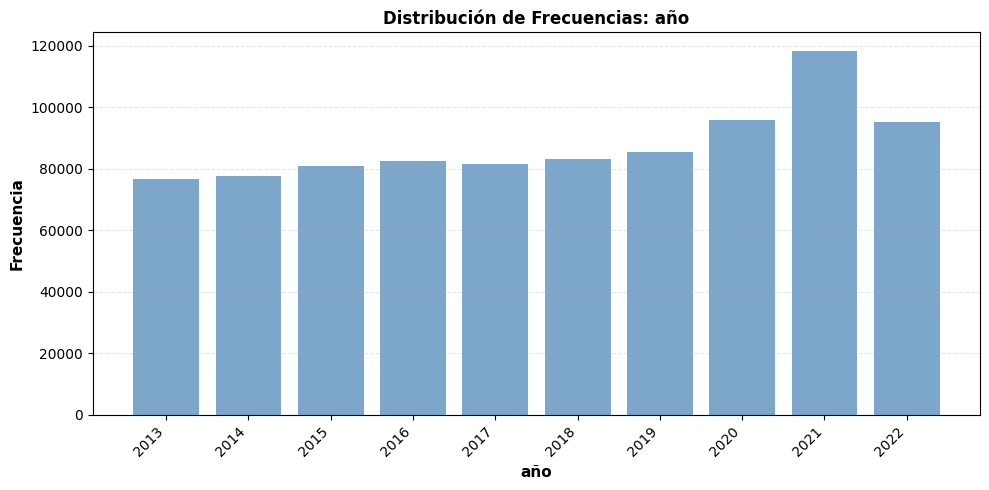


TABLA DE FRECUENCIA: Sexo



,Categoría,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada,Freq. Acumulada %
0,1.0,491819,56.01,491819,56.01
1,2.0,386317,43.99,878136,100.00


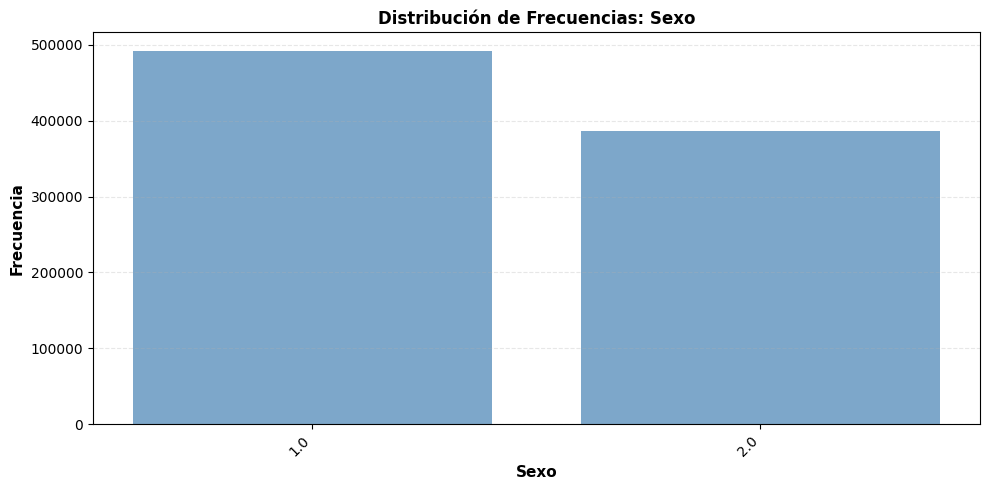


TABLA DE FRECUENCIA: Depreg



,Categoría,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada,Freq. Acumulada %
0,1.0,257619,29.34,257619,29.34
1,2.0,8907,1.01,266526,30.35
2,3.0,18252,2.08,284778,32.43
3,4.0,31274,3.56,316052,35.99
4,5.0,49618,5.65,365670,41.64
5,6.0,23965,2.73,389635,44.37
6,7.0,20812,2.37,410447,46.74
7,8.0,26157,2.98,436604,49.72
8,9.0,54538,6.21,491142,55.93
9,10.0,33191,3.78,524333,59.71


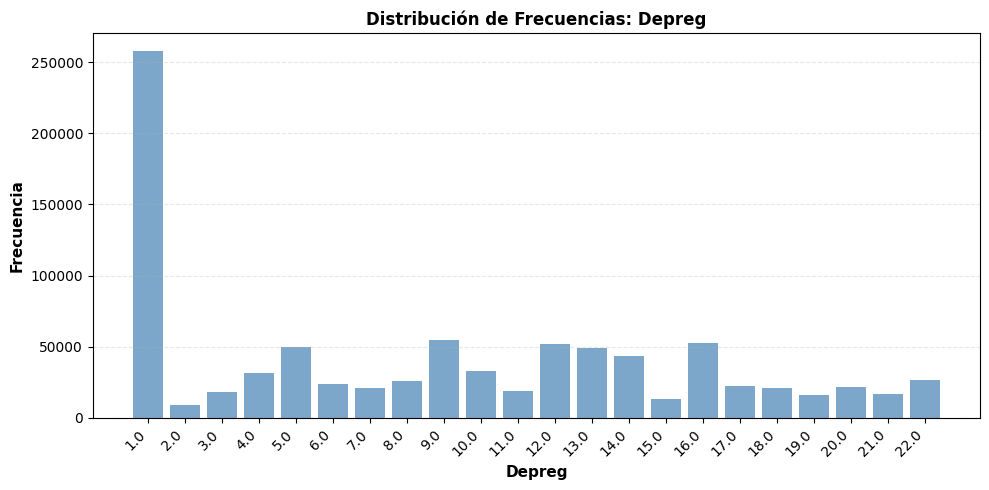


TABLA DE FRECUENCIA: Cerdef



,Categoría,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada,Freq. Acumulada %
0,1.0,510172,58.10,510172,58.10
1,2.0,5220,0.59,515392,58.69
2,3.0,4029,0.46,519421,59.15
3,9.0,358715,40.85,878136,100.00


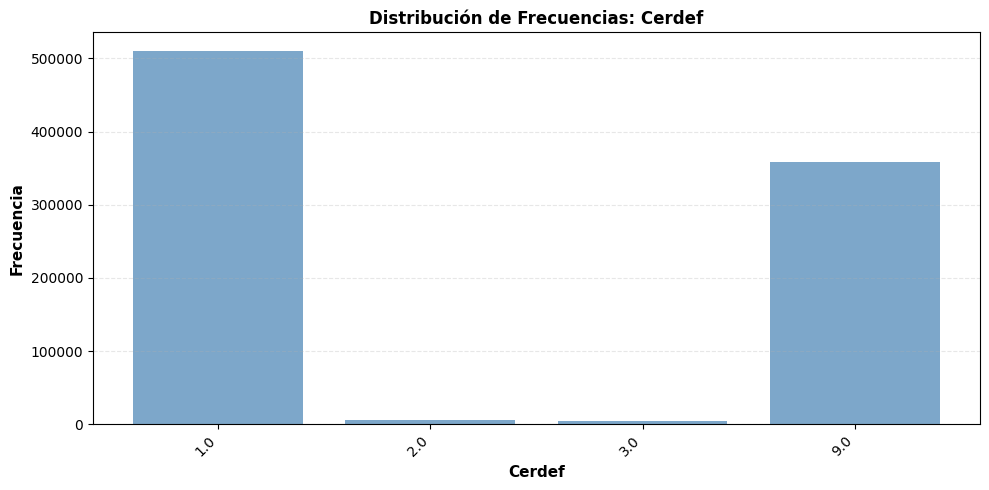

In [11]:
if df_consolidado is not None:
    print("="*70)
    print("TABLAS DE FRECUENCIA")
    print("="*70)

    if "pick_col" in globals():
        sexo_col = pick_col(["Sexo"]) 
        depreg_col = pick_col(["Depreg"])
        cerdef_col = pick_col(["Cerdef", "Certifi", "Certificador"]) 
    else:
        sexo_col = "Sexo" if "Sexo" in df_consolidado.columns else None
        depreg_col = "Depreg" if "Depreg" in df_consolidado.columns else None
        cerdef_col = "Cerdef" if "Cerdef" in df_consolidado.columns else None

    variables_importantes = [
        "año",
        sexo_col,
        depreg_col,
        cerdef_col
    ]

    variables_importantes = [v for v in variables_importantes if v is not None and v in df_consolidado.columns]

    for col in variables_importantes:
        print(f"\n{'='*70}")
        print(f"TABLA DE FRECUENCIA: {col}")
        print(f"{'='*70}\n")

        freq = df_consolidado[col].value_counts().sort_index()
        freq_df = pd.DataFrame({
            'Categoría': freq.index,
            'Frecuencia': freq.values,
            'Frecuencia Relativa': (freq.values / len(df_consolidado) * 100).round(2),
            'Frecuencia Acumulada': freq.values.cumsum(),
            'Freq. Acumulada %': (freq.values.cumsum() / len(df_consolidado) * 100).round(2)
        }).reset_index(drop=True)

        display(freq_df)

        fig, ax = plt.subplots(figsize=(10, 5))
        ax.bar(range(len(freq)), freq.values, color='steelblue', alpha=0.7)
        ax.set_xlabel(col, fontsize=11, fontweight='bold')
        ax.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
        ax.set_title(f'Distribución de Frecuencias: {col}', fontsize=12, fontweight='bold')
        ax.set_xticks(range(len(freq)))
        ax.set_xticklabels(freq.index, rotation=45, ha='right')
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.show()

## 5. Relaciones entre las Variables

ANÁLISIS DE RELACIONES ENTRE VARIABLES

MATRIZ DE CORRELACIÓN DE PEARSON
----------------------------------------------------------------------


,Añoreg,Añoocu,Diaocu,Edadif,año
Añoreg,1.000000,0.997265,0.006784,-0.015766,0.998322
Añoocu,0.997265,1.000000,-0.000038,0.018376,1.000000
Diaocu,0.006784,-0.000038,1.000000,0.001892,0.000418
Edadif,-0.015766,0.018376,0.001892,1.000000,-0.017018
año,0.998322,1.000000,0.000418,-0.017018,1.000000


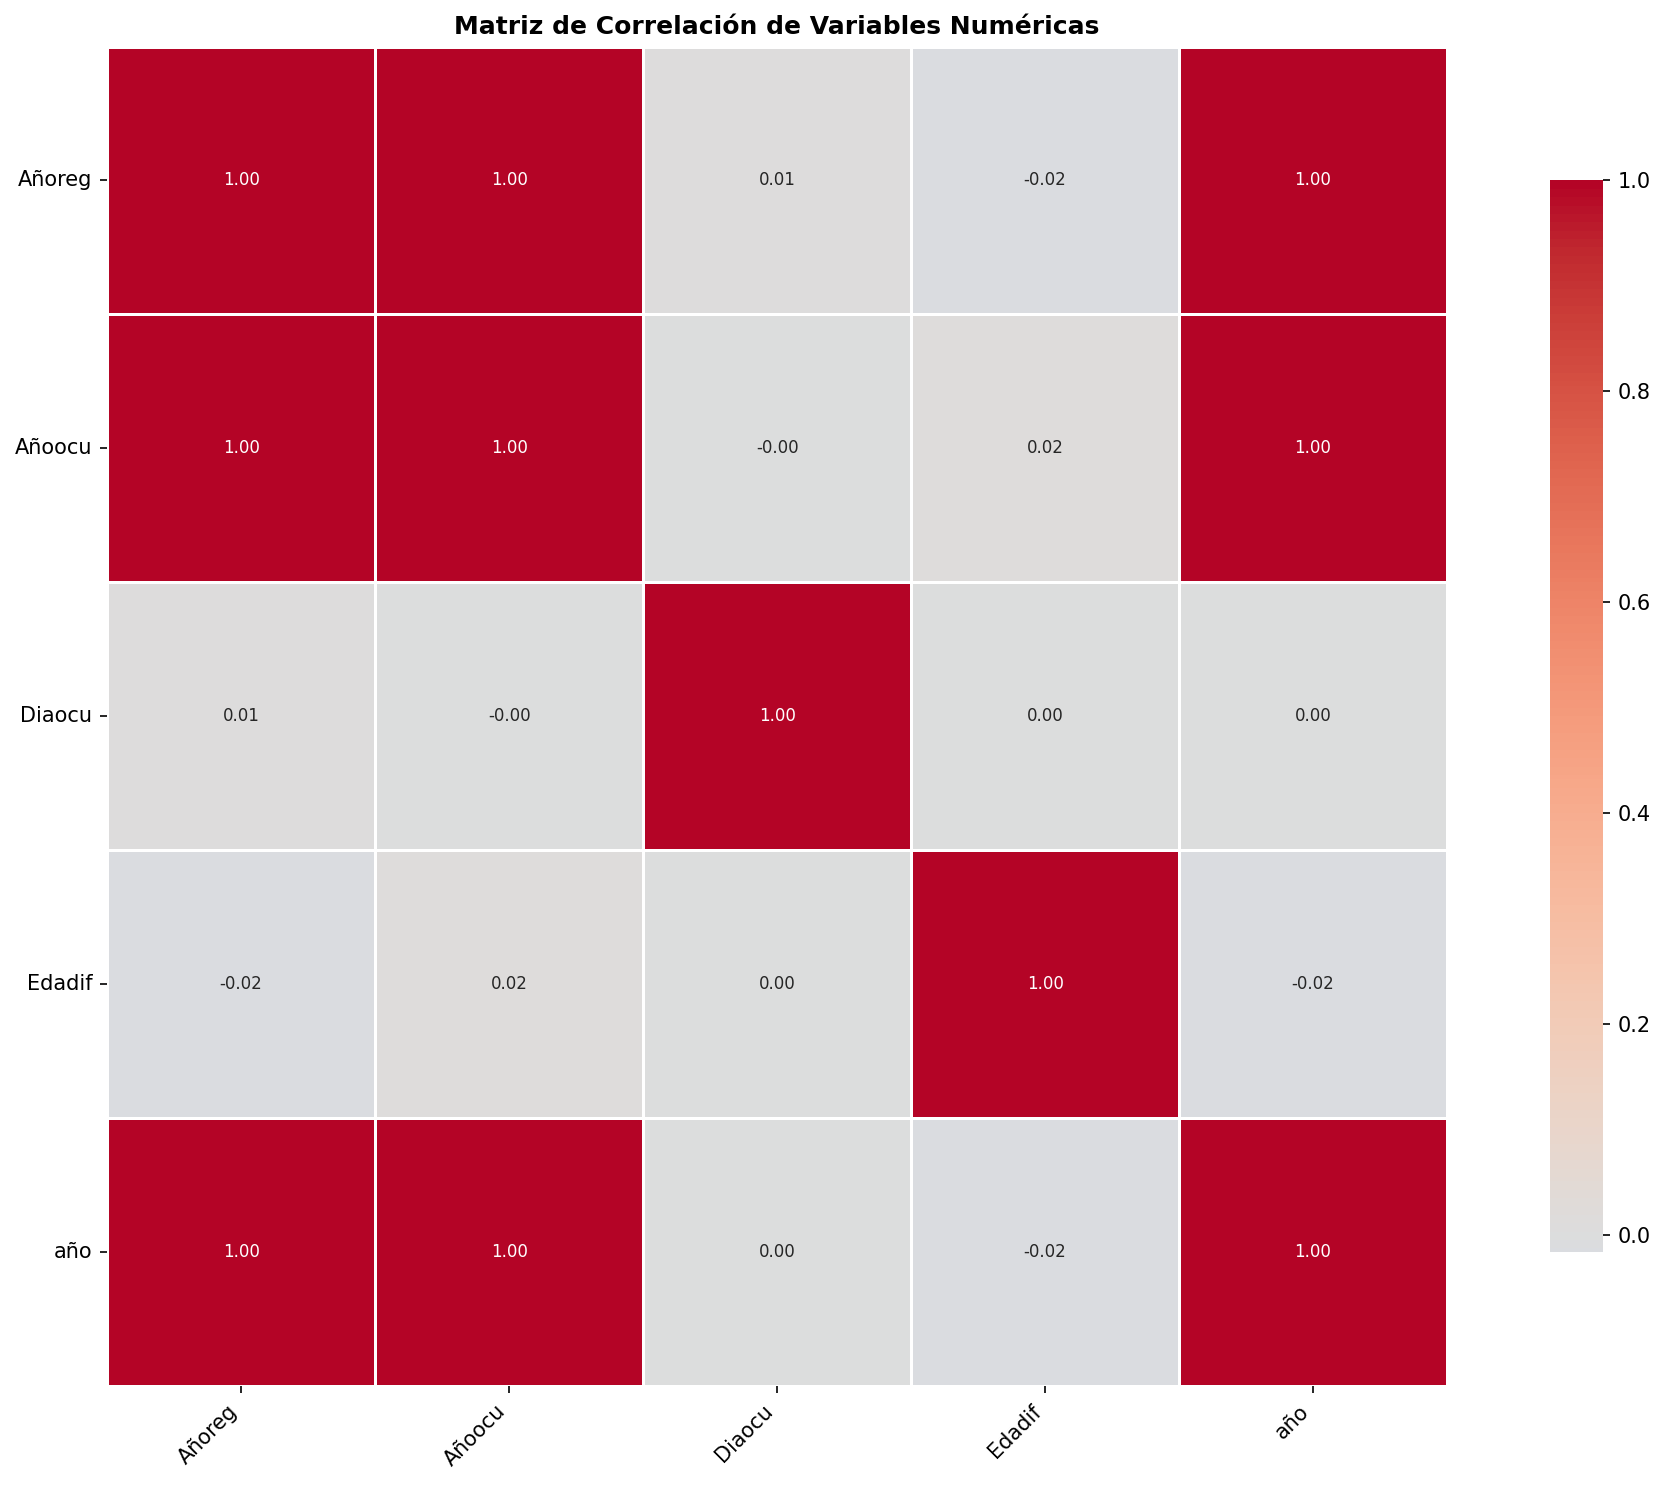


TABLAS DE CONTINGENCIA (Variables Categóricas)


TABLA DE CONTINGENCIA: Sexo × Departamento de Registro
----------------------------------------------------------------------


Depreg,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,Total
Sexo,,,,,,,,,,,,,,,,,,,,,
1.0,144957,5041,9962,17268,29593,13917,11449,14308,30413,18727,...,23140,6772,27196,13309,12153,8966,12426,9576,15054,491819
2.0,112662,3866,8290,14006,20025,10048,9363,11849,24125,14464,...,20137,6225,25342,9092,8823,6859,9255,7541,11658,386317
Total,257619,8907,18252,31274,49618,23965,20812,26157,54538,33191,...,43277,12997,52538,22401,20976,15825,21681,17117,26712,878136


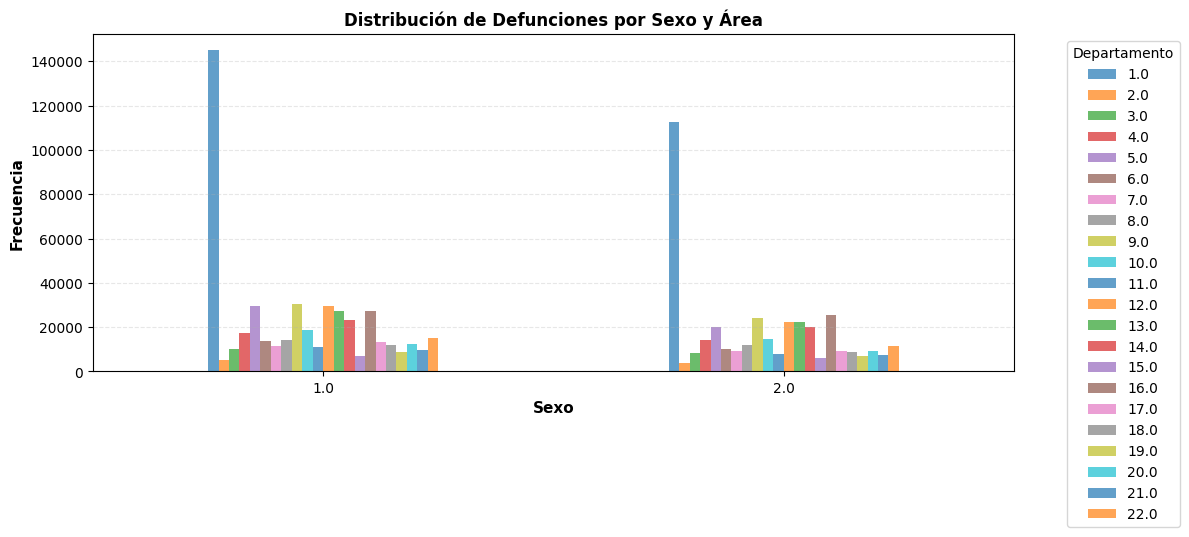


EVOLUCIÓN TEMPORAL: Defunciones por Año


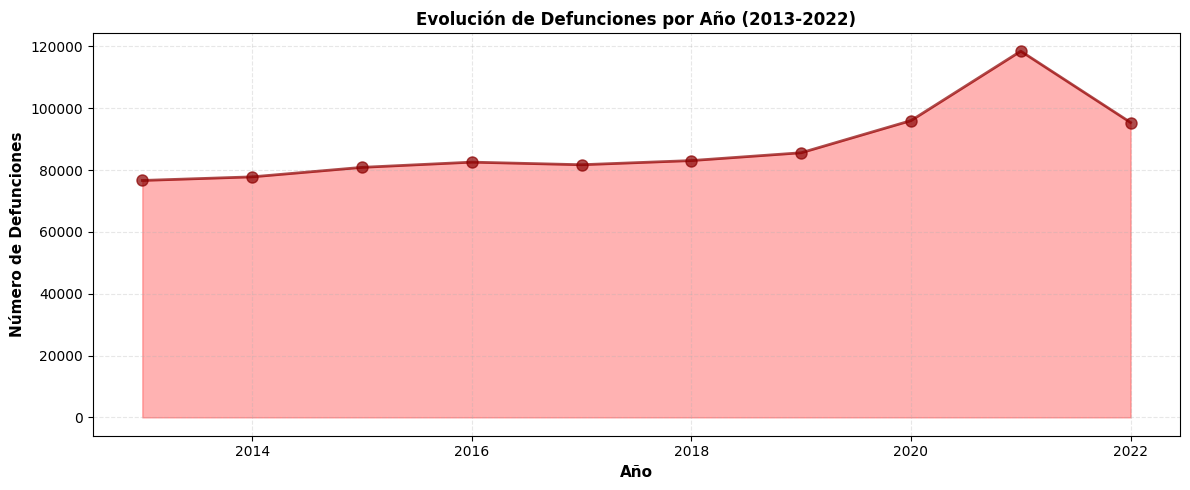


ASOCIACIÓN ENTRE VARIABLES CATEGÓRICAS (V de Cramér)


  Depreg               ↔ Mupreg               : V = 1.0000 (asociación fuerte)
  Depreg               ↔ Mesreg               : V = 0.0125 (asociación muy débil)
  Depreg               ↔ Depocu               : V = 0.9615 (asociación fuerte)
  Depreg               ↔ Mupocu               : V = 0.9626 (asociación fuerte)
  Mupreg               ↔ Mesreg               : V = 0.0273 (asociación muy débil)
  Mupreg               ↔ Depocu               : V = 0.9624 (asociación fuerte)
  Mupreg               ↔ Mupocu               : V = 0.8602 (asociación fuerte)
  Mesreg               ↔ Depocu               : V = 0.0125 (asociación muy débil)
  Mesreg               ↔ Mupocu               : V = 0.0265 (asociación muy débil)
  Depocu               ↔ Mupocu               : V = 1.0000 (asociación fuerte)

ANÁLISIS COMPLETADO


In [12]:
if df_consolidado is not None:
    print("="*70)
    print("ANÁLISIS DE RELACIONES ENTRE VARIABLES")
    print("="*70)

    if "variables_cuantitativas" in globals():
        numeric_cols = [c for c in variables_cuantitativas if c in df_consolidado.columns]
    else:
        numeric_cols = df_consolidado.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if len(numeric_cols) > 1:
        print("\nMATRIZ DE CORRELACIÓN DE PEARSON")
        print("-"*70)

        corr_matrix = df_consolidado[numeric_cols].corr()
        display(corr_matrix)

        fig, ax = plt.subplots(figsize=(14, 10), dpi=150)
        sns.heatmap(
            corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            annot_kws={"size": 8},
            cbar_kws={"shrink": 0.8},
            ax=ax
        )
        ax.set_title('Matriz de Correlación de Variables Numéricas',
                     fontsize=12, fontweight='bold')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout()
        plt.show()

    print("\n" + "="*70)
    print("TABLAS DE CONTINGENCIA (Variables Categóricas)")
    print("="*70)

    if "pick_col" in globals():
        sexo_col = pick_col(["Sexo"]) 
        depreg_col = pick_col(["Depreg"])
    else:
        sexo_col = "Sexo" if "Sexo" in df_consolidado.columns else None
        depreg_col = "Depreg" if "Depreg" in df_consolidado.columns else None

    if sexo_col is not None and depreg_col is not None:
        print("\n\nTABLA DE CONTINGENCIA: Sexo × Departamento de Registro")
        print("-"*70)
        contingencia_sexo_depreg = pd.crosstab(
            df_consolidado[sexo_col],
            df_consolidado[depreg_col],
            margins=True,
            margins_name='Total'
        )
        display(contingencia_sexo_depreg)

        contingencia_plot = pd.crosstab(
            df_consolidado[sexo_col],
            df_consolidado[depreg_col]
        )
        contingencia_plot.plot(kind='bar', figsize=(12, 5), alpha=0.7)
        plt.title('Distribución de Defunciones por Sexo y Área',
                 fontsize=12, fontweight='bold')
        plt.xlabel('Sexo', fontsize=11, fontweight='bold')
        plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
        plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=0)
        plt.grid(axis='y', alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.show()

    if 'año' in df_consolidado.columns:
        print("\n" + "="*70)
        print("EVOLUCIÓN TEMPORAL: Defunciones por Año")
        print("="*70)

        defunciones_por_año = df_consolidado['año'].value_counts().sort_index()

        fig, ax = plt.subplots(figsize=(12, 5))
        ax.plot(defunciones_por_año.index, defunciones_por_año.values,
               marker='o', linewidth=2, markersize=8, color='darkred', alpha=0.7)
        ax.fill_between(defunciones_por_año.index, defunciones_por_año.values,
                       alpha=0.3, color='red')
        ax.set_xlabel('Año', fontsize=11, fontweight='bold')
        ax.set_ylabel('Número de Defunciones', fontsize=11, fontweight='bold')
        ax.set_title('Evolución de Defunciones por Año (2013-2022)',
                    fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.show()

    print("\n" + "="*70)
    print("ASOCIACIÓN ENTRE VARIABLES CATEGÓRICAS (V de Cramér)")
    print("="*70)

    if "variables_cualitativas" in globals():
        categorical_cols = [c for c in variables_cualitativas if c in df_consolidado.columns]
    else:
        categorical_cols = []

    extra_categoricas = [
        c for c in df_consolidado.select_dtypes(include=['object']).columns
        if c != 'año' and c not in categorical_cols and c != 'caudef.descrip'
    ]
    categorical_cols = list(dict.fromkeys(categorical_cols + extra_categoricas))

    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = stats.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        min_dim = min(confusion_matrix.shape) - 1
        return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

    print("\n")
    for i, col1 in enumerate(categorical_cols[:5]):
        for col2 in categorical_cols[i+1:5]:
            try:
                v = cramers_v(df_consolidado[col1].dropna(),
                             df_consolidado[col2].dropna())
                print(f"  {col1:20s} ↔ {col2:20s} : V = {v:.4f}", end="")

                if v < 0.1:
                    print(" (asociación muy débil)")
                elif v < 0.3:
                    print(" (asociación débil)")
                elif v < 0.5:
                    print(" (asociación moderada)")
                else:
                    print(" (asociación fuerte)")
            except:
                pass

    print("\n" + "="*70)
    print("ANÁLISIS COMPLETADO")
    print("="*70)